# Business Challenge: EDA and SQL

### Introduction

A data project lifecycle has many phases, rather than being just an isolated analysis in a single tool. In this project you will experience doing an analysis using both Python and SQL to obtain the final result, by exploring each tool's behavior.

### Strategic insights for the brewing industry

### Main Objective

This project aims to analyze different beer styles in relation to their alcohol content and target consumer profiles. By comparing mainstream industrial beers with premium craft options, the study identifies key trends and preferences among consumers. These insights provide valuable support for breweries in developing market strategies, product development, and marketing approaches tailored to distinct consumer segments.

### Quality Analysis (QA) and Exploratory Data Analysis (EDA)

In [48]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
# Reading the file
beer=pd.read_csv('archive/beer_reviews.csv')

In [50]:
beer.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [51]:
beer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586614 non-null  int64  
 1   brewery_name        1586599 non-null  object 
 2   review_time         1586614 non-null  int64  
 3   review_overall      1586614 non-null  float64
 4   review_aroma        1586614 non-null  float64
 5   review_appearance   1586614 non-null  float64
 6   review_profilename  1586266 non-null  object 
 7   beer_style          1586614 non-null  object 
 8   review_palate       1586614 non-null  float64
 9   review_taste        1586614 non-null  float64
 10  beer_name           1586614 non-null  object 
 11  beer_abv            1518829 non-null  float64
 12  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


In [52]:
# Checking the missing values
missing_values = pd.isnull(beer)
missing_counts = missing_values.sum()
print(missing_counts)

brewery_id                0
brewery_name             15
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
beer_beerid               0
dtype: int64


The column brewery_name has 15 NaN values, but the rest of the information in that rows will be relevant for my future analyses.
I will keep that rows, and I will replace the NaN values for brewery_id.

In [53]:
beer['brewery_name'] = beer['brewery_name'].fillna(beer['brewery_id'])

Now is possible to drop brewery_id,because only the name will be relevant for my future analyses.

In [54]:
beer = beer.drop(['brewery_id'], axis=1)
print(beer.shape)
beer.head()

(1586614, 12)


,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


Before continuing with checking for missing values, 
I will first check for possible duplicates, check for unique values and data types.

In [55]:
# All columns
beer.columns

Index(['brewery_name', 'review_time', 'review_overall', 'review_aroma',
       'review_appearance', 'review_profilename', 'beer_style',
       'review_palate', 'review_taste', 'beer_name', 'beer_abv',
       'beer_beerid'],
      dtype='object')

For all the columns some are categorical and some are numeric:

categorical: brewery_name, review_profilename, beer_style, beer_name and beer_beerid

numeric: All the reviews for the beer and beer_abv

In [56]:
# Changing beer_beerid to categorical
beer['beer_beerid'] = beer['beer_beerid'].astype('category')

In [57]:
# Since review_time is a date, I will convert to datetime
beer['review_time'] = pd.to_datetime(beer['review_time'], unit='s')

In [58]:
# Checking how many unique values per column
beer.nunique()

brewery_name             5744
review_time           1577960
review_overall             10
review_aroma                9
review_appearance          10
review_profilename      33387
beer_style                104
review_palate               9
review_taste                9
beer_name               56857
beer_abv                  530
beer_beerid             66055
dtype: int64

In [59]:
# Since beer_style does not have that many different unique values, will be better and easier 
# for the analysis if I convert it to category type.
beer['beer_style'] = beer['beer_style'].astype('category')

In [60]:
# Checking the types again
beer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   brewery_name        1586614 non-null  object        
 1   review_time         1586614 non-null  datetime64[ns]
 2   review_overall      1586614 non-null  float64       
 3   review_aroma        1586614 non-null  float64       
 4   review_appearance   1586614 non-null  float64       
 5   review_profilename  1586266 non-null  object        
 6   beer_style          1586614 non-null  category      
 7   review_palate       1586614 non-null  float64       
 8   review_taste        1586614 non-null  float64       
 9   beer_name           1586614 non-null  object        
 10  beer_abv            1518829 non-null  float64       
 11  beer_beerid         1586614 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(6), object(3)
memory usage:

Now all the columns have their correct types according to categorical and numeric.

In [61]:
# Checking for duplicates
beer.duplicated().any()

False

In [62]:
# Checking for " "
(beer == '').any()

brewery_name          False
review_time           False
review_overall        False
review_aroma          False
review_appearance     False
review_profilename    False
beer_style            False
review_palate         False
review_taste          False
beer_name             False
beer_abv              False
beer_beerid           False
dtype: bool

In [63]:
# Checking columns with unique values
columns_with_unique = beer.apply(lambda col: col.is_unique)

print(columns_with_unique)

brewery_name          False
review_time           False
review_overall        False
review_aroma          False
review_appearance     False
review_profilename    False
beer_style            False
review_palate         False
review_taste          False
beer_name             False
beer_abv              False
beer_beerid           False
dtype: bool


In [64]:
beer.describe()

,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv
count,1586614,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.518829e+06
mean,2008-10-15 16:48:00.012210944,3.815581e+00,3.735636e+00,3.841642e+00,3.743701e+00,3.792860e+00,7.042387e+00
min,1996-08-22 00:00:01,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02
25%,2007-03-06 23:36:28.249999872,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,5.200000e+00
50%,2009-04-08 15:01:21.500000,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.500000e+00
75%,2010-10-31 23:40:05.249999872,4.500000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.500000e+00,8.500000e+00
max,2012-01-11 12:35:48,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.770000e+01
std,NaN,7.206219e-01,6.976167e-01,6.160928e-01,6.822184e-01,7.319696e-01,2.322526e+00


In [65]:
# Checking again the missing values
missing_values = pd.isnull(beer)
missing_counts = missing_values.sum()
print(missing_counts)

brewery_name              0
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
beer_beerid               0
dtype: int64


The same reason for keeping the rows with NaN in brewery_name will be kept for review_profilename.
I will replace the NaN for 'No identification'.

In [66]:
beer['review_profilename'] = beer['review_profilename'].fillna('No identification')

In [67]:
# Checking again the missing values
missing_values = pd.isnull(beer)
missing_counts = missing_values.sum()
print(missing_counts)

brewery_name              0
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename        0
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
beer_beerid               0
dtype: int64


Now it has NaN only for beer_abv. Lets check this column.

In [68]:
beer[beer['beer_abv'].isnull()].head(10)

,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
273,Caldera Brewing Company,2004-12-21 22:29:55,3.0,3.0,3.0,RedDiamond,American Stout,4.0,3.0,Cauldron Espresso Stout,NaN,21241
430,Moon River Brewing Company,2005-03-13 17:48:30,3.5,4.0,4.5,cMonkey,Scotch Ale / Wee Heavy,3.5,3.5,The Highland Stagger,NaN,20689
603,Moon River Brewing Company,2004-11-09 22:20:19,4.0,3.5,4.0,aracauna,Scotch Ale / Wee Heavy,3.5,3.5,The Highland Stagger,NaN,20689
733,Caldera Brewing Company,2009-12-13 03:12:01,4.0,4.0,4.0,plaid75,American IPA,4.0,4.0,Alpha Beta,NaN,54723
798,Caldera Brewing Company,2008-05-31 02:34:28,4.5,4.5,4.0,grumpy,American Double / Imperial Stout,4.0,4.5,Imperial Stout,NaN,42964
927,Pacific Coast Brewing Company,2010-12-28 17:57:56,1.0,1.5,3.0,womencantsail,American Strong Ale,2.5,1.5,Megalodon,NaN,64803
944,Pacific Coast Brewing Company,2008-03-15 20:49:14,1.5,2.0,1.5,JDV,Belgian Strong Pale Ale,1.0,3.0,Holiday Trappist Style Ale,NaN,41584
960,Pacific Coast Brewing Company,2008-07-11 02:30:07,4.0,3.5,4.0,hoegaardenhero,American Amber / Red Ale,4.5,3.5,Emerald Ale,NaN,37498
961,Pacific Coast Brewing Company,2008-02-19 00:08:19,4.0,4.0,4.0,barleywinefiend,American Amber / Red Ale,4.0,4.0,Emerald Ale,NaN,37498
962,Pacific Coast Brewing Company,2007-07-01 03:32:54,4.0,4.0,4.5,Mark,American Amber / Red Ale,4.5,4.0,Emerald Ale,NaN,37498


Is possible to relate the abv with the beer style

In [69]:
beer[beer['beer_abv'].isna()]['beer_style'].value_counts()

beer_style
American Pale Ale (APA)            5388
American IPA                       4422
American Amber / Red Ale           4011
American Porter                    3827
Hefeweizen                         1980
                                   ... 
Japanese Rice Lager                  13
Euro Strong Lager                     9
Bière de Champagne / Bière Brut       5
Happoshu                              4
Faro                                  0
Name: count, Length: 104, dtype: int64

In [70]:
beer['beer_style'].value_counts()

beer_style
American IPA                        117586
American Double / Imperial IPA       85977
American Pale Ale (APA)              63469
Russian Imperial Stout               54129
American Double / Imperial Stout     50705
                                     ...  
Gose                                   686
Faro                                   609
Roggenbier                             466
Kvass                                  297
Happoshu                               241
Name: count, Length: 104, dtype: int64

I will create two new columns.

For the first one I will replace the NaN of beer_abv with the average for the same beer style.

For the second one I will replace with the mode.

In [71]:
# Method 1: Fill by the average ABV of the same style

beer['beer_abv_mean_fill'] = beer['beer_abv']

mean_abv_per_style = beer.groupby('beer_style')['beer_abv'].transform('mean')

beer['beer_abv_mean_fill'] = beer['beer_abv_mean_fill'].fillna(mean_abv_per_style)


# Method 2: Fill using the mode of the ABV for the same style

def fill_na_with_mode(group):
    mode = group.mode()
    if not mode.empty:
        mean_mode = mode.mean()
        return group.fillna(mean_mode)
    else:
        return group

beer['beer_abv_mode_fill'] = beer.groupby('beer_style')['beer_abv'].transform(fill_na_with_mode)


In [72]:
beer.head()

,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,beer_abv_mean_fill,beer_abv_mode_fill
0,Vecchio Birraio,2009-02-16 20:57:03,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986,5.0,5.0
1,Vecchio Birraio,2009-03-01 13:44:57,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213,6.2,6.2
2,Vecchio Birraio,2009-03-01 14:10:04,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215,6.5,6.5
3,Vecchio Birraio,2009-02-15 19:12:25,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969,5.0,5.0
4,Caldera Brewing Company,2010-12-30 18:53:26,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883,7.7,7.7


### Univariate Analysis

Comparing the columns with abv

In [73]:
# Checking first for the original column abv

subset_abv = beer[['beer_abv']]
subset_abv= subset_abv.dropna()
print("ABV:")
print(subset_abv['beer_abv'].describe())


ABV:
count    1.518829e+06
mean     7.042387e+00
std      2.322526e+00
min      1.000000e-02
25%      5.200000e+00
50%      6.500000e+00
75%      8.500000e+00
max      5.770000e+01
Name: beer_abv, dtype: float64


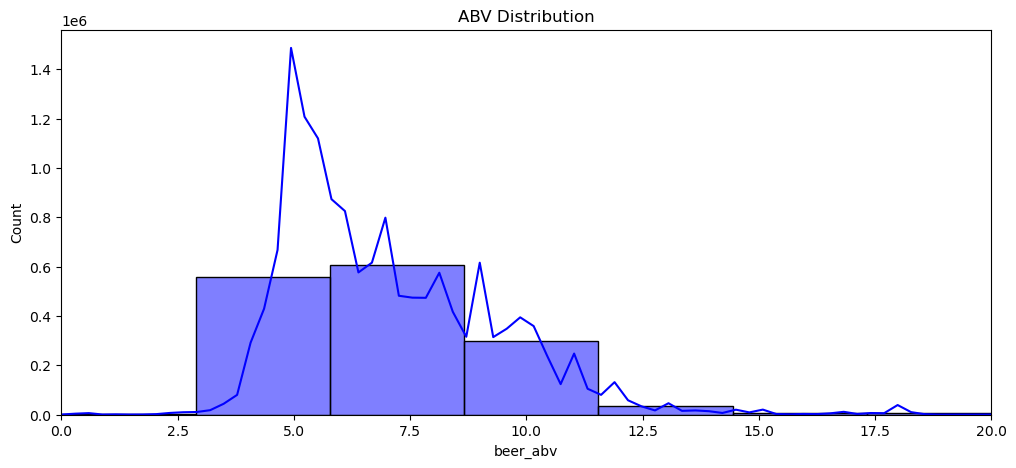

In [74]:
plt.figure(figsize=(12, 5))

# Histogram of the filled column with mean
sns.histplot(subset_abv['beer_abv'], bins=20, kde=True, color='blue')
plt.xlim(0, 20)
plt.title('ABV Distribution')
plt.show()

In [75]:
# Checking the new columns

print("ABV filled with mean:")
print(beer['beer_abv_mean_fill'].describe())

print("\nABV filled with mode:")
print(beer['beer_abv_mode_fill'].describe())

ABV filled with mean:
count    1.586614e+06
mean     7.001855e+00
std      2.297935e+00
min      1.000000e-02
25%      5.200000e+00
50%      6.500000e+00
75%      8.500000e+00
max      5.770000e+01
Name: beer_abv_mean_fill, dtype: float64

ABV filled with mode:
count    1.586614e+06
mean     6.992876e+00
std      2.305957e+00
min      1.000000e-02
25%      5.200000e+00
50%      6.500000e+00
75%      8.500000e+00
max      5.770000e+01
Name: beer_abv_mode_fill, dtype: float64


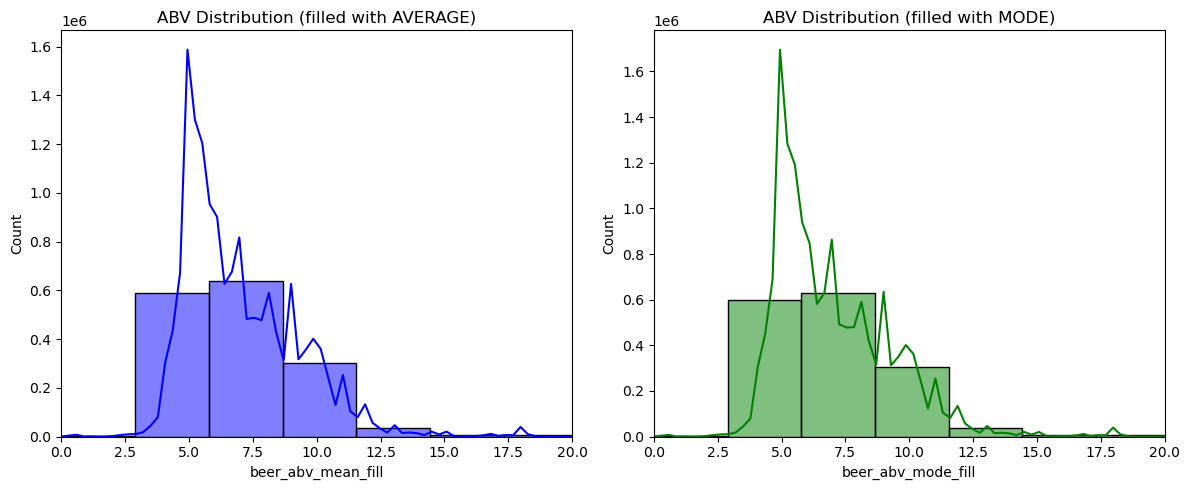

In [76]:
plt.figure(figsize=(12, 5))

# Histogram of the filled column with mean
plt.subplot(1, 2, 1)
sns.histplot(beer['beer_abv_mean_fill'], bins=20, kde=True, color='blue')
plt.xlim(0, 20)
plt.title('ABV Distribution (filled with AVERAGE)')

# Histogram of the filled column with mode
plt.subplot(1, 2, 2)
sns.histplot(beer['beer_abv_mode_fill'], bins=20, kde=True, color='green')
plt.xlim(0, 20)
plt.title('ABV Distribution (filled with MODE)')

plt.tight_layout()
plt.show()

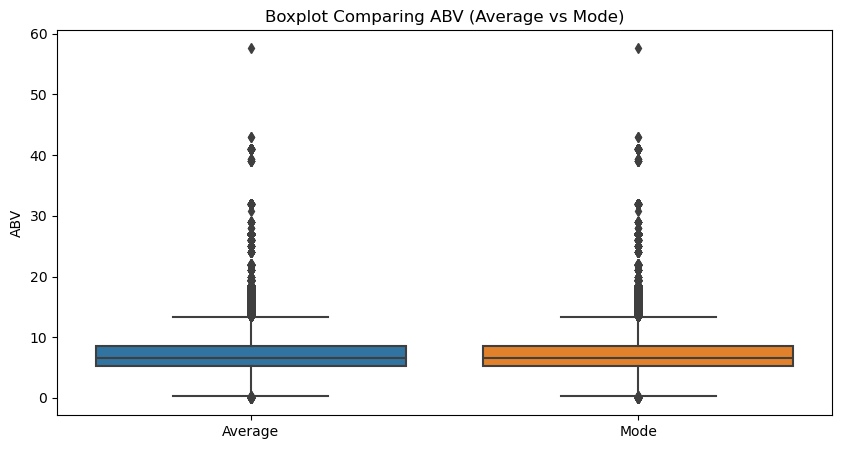

In [77]:
plt.figure(figsize=(10, 5))

sns.boxplot(data=beer[['beer_abv_mean_fill', 'beer_abv_mode_fill']])
plt.title('Boxplot Comparing ABV (Average vs Mode)')
plt.ylabel('ABV')
plt.xticks([0, 1], ['Average', 'Mode'])

plt.show()

The boxplot shows that both imputation methods — average and mode — result in nearly identical ABV distributions. The central tendency (median) and spread (IQR) are preserved, and the presence of high-end outliers remains unaffected. This visual confirmation supports the statistical insight that both methods are valid, but mean imputation slightly better maintains the original data characteristics.

In [78]:
cv_mode = beer['beer_abv_mode_fill'].std() / beer['beer_abv_mode_fill'].mean()
cv_mean =beer['beer_abv_mean_fill'].std() / beer['beer_abv_mean_fill'].mean()
print('The cv_mode is:',cv_mode)
print('The cv_mean is:',cv_mean)

The cv_mode is: 0.32975809158259994
The cv_mean is: 0.3281895143378354


##### Insights
Both imputation methods had minimal impact on the distribution due to the large sample size. However, mean imputation preserved the overall statistical properties slightly better, especially the original mean and standard deviation.

Therefore, if the goal is to maintain the integrity of the original distribution, mean imputation is the more suitable choice for this dataset.

Most Beers Are Mid-Strength

The mean ABV is ~7.04%, with the median at 6.5%, showing that most beers in this dataset are moderate to strong in alcohol content.

75% of beers have ABV below 8.5%, reinforcing that extremely strong beers are less common.

There Are Some Outliers (Very Strong Beers)

The maximum ABV is 57.7%, which is unusually high for beer. This suggests presence of rare, extreme products (likely special editions or niche craft beers).

From a business standpoint, this could point to opportunities in the high-ABV craft niche, but also quality/data validation issues (i.e., is that 57.7% real or an error?).

Skewed Distribution Toward Lower ABV

The histogram and KDE curve show a right-skewed distribution, indicating that the majority of beers have ABV between ~4% and 7%.

This is aligned with consumer preferences for sessionable beers, which are easier to drink and more socially acceptable in volume.

Standard Deviation (~2.32%) Shows Decent Variety

There is a healthy spread of ABV values, indicating a diverse product offering in the beer market.

Breweries can segment their products (light, medium, strong) to target different consumer profiles.

#### Univariate analysis for the numeric types

In [79]:
# review_overall
print("Review overall:")
print(beer['review_overall'].describe())

cv_overall = beer['review_overall'].std() / beer['review_overall'].mean()
print('\nThe cv_overall is:',cv_overall)


Review overall:
count    1.586614e+06
mean     3.815581e+00
std      7.206219e-01
min      0.000000e+00
25%      3.500000e+00
50%      4.000000e+00
75%      4.500000e+00
max      5.000000e+00
Name: review_overall, dtype: float64

The cv_overall is: 0.18886295317994742


In [80]:
# review_aroma
print("Review aroma:")
print(beer['review_aroma'].describe())

cv_aroma = beer['review_aroma'].std() / beer['review_aroma'].mean()
print('\nThe cv_aroma is:',cv_aroma)

Review aroma:
count    1.586614e+06
mean     3.735636e+00
std      6.976167e-01
min      1.000000e+00
25%      3.500000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: review_aroma, dtype: float64

The cv_aroma is: 0.18674643735631685


In [81]:
# review_appearance
print("Review appearance:")
print(beer['review_appearance'].describe())

cv_appearance = beer['review_appearance'].std() / beer['review_appearance'].mean()
print('\nThe cv_appearance is:',cv_appearance)

Review appearance:
count    1.586614e+06
mean     3.841642e+00
std      6.160928e-01
min      0.000000e+00
25%      3.500000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: review_appearance, dtype: float64

The cv_appearance is: 0.1603722620245907


In [82]:
# review_palate
print("Review palate:")
print(beer['review_palate'].describe())

cv_palate = beer['review_palate'].std() / beer['review_palate'].mean()
print('\nThe cv_palate is:',cv_palate)

Review palate:
count    1.586614e+06
mean     3.743701e+00
std      6.822184e-01
min      1.000000e+00
25%      3.500000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: review_palate, dtype: float64

The cv_palate is: 0.18223097853658787


In [83]:
# review_taste
print("Review taste:")
print(beer['review_taste'].describe())

cv_taste = beer['review_taste'].std() / beer['review_taste'].mean()
print('\nThe cv_taste is:',cv_taste)

Review taste:
count    1.586614e+06
mean     3.792860e+00
std      7.319696e-01
min      1.000000e+00
25%      3.500000e+00
50%      4.000000e+00
75%      4.500000e+00
max      5.000000e+00
Name: review_taste, dtype: float64

The cv_taste is: 0.1929861692333794


##### Insights

The CV is a statistical measure used to assess the relative dispersion of a data set. It shows how large the variability of the data is in relation to the mean.

All reviews have a CV between 0.1 and 0.2.

Users have relatively consistent opinions, but there is still some divergence in perceptions, which is expected with subjective evaluations such as taste, aroma, etc.

No dimension is excessively dispersed (above 0.3), which suggests that the data is statistically reliable.

The consistency is good, allowing for comparative analyses between beers with a reasonable level of confidence.

#### Univariate analysis for the category types

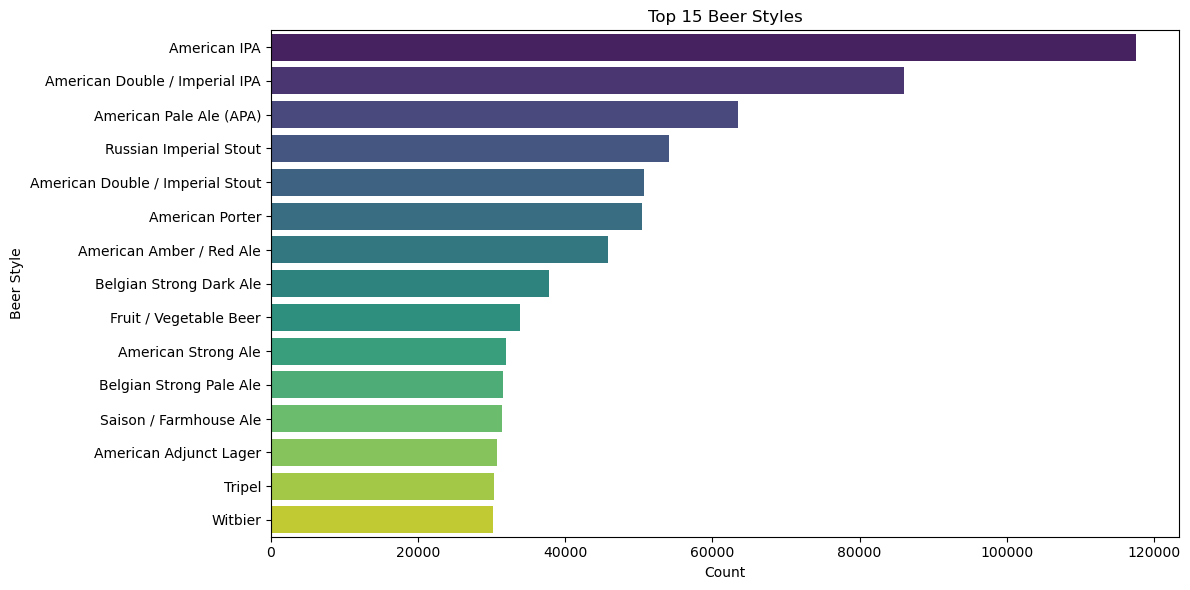

In [84]:
# beer_style
# Percentage of each style in relation to the total
beer['beer_style'].value_counts(normalize=True) * 100


# Get the top 15 most frequent beer styles
top15_styles = beer['beer_style'].value_counts().nlargest(15).index

# Filter the DataFrame to include only those styles
beer_top15 = beer[beer['beer_style'].isin(top15_styles)]

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.countplot(data=beer_top15, y='beer_style', order=top15_styles, palette='viridis')

plt.title('Top 15 Beer Styles')
plt.xlabel('Count')
plt.ylabel('Beer Style')
plt.tight_layout()
plt.show()

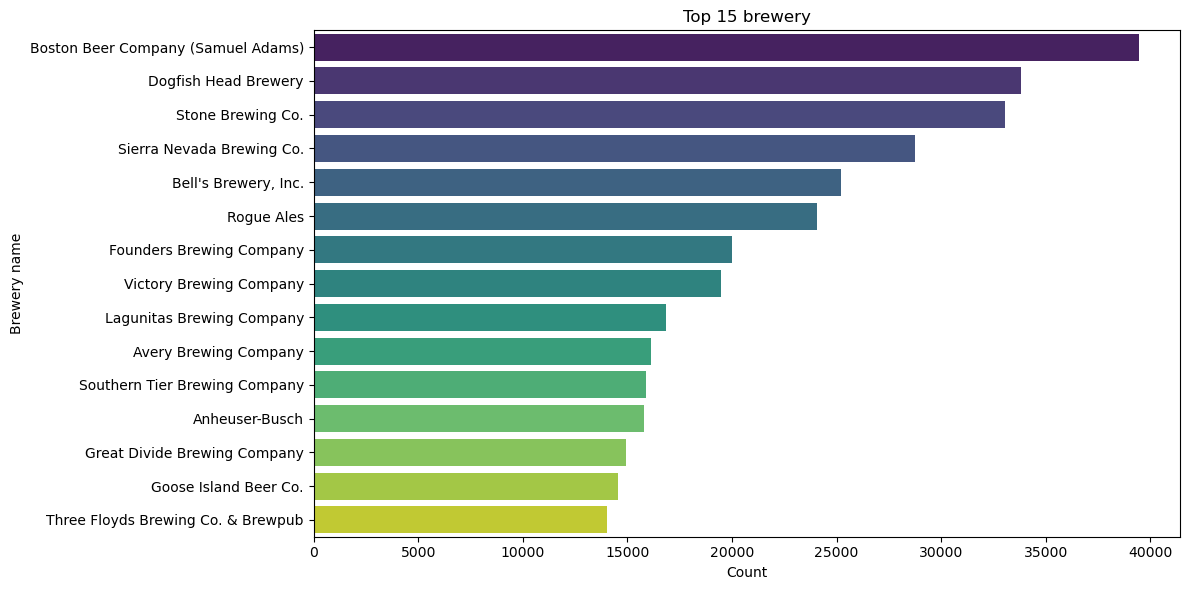

In [85]:
# brewery_name
# Percentage of each brewery_name in relation to the total
beer['brewery_name'].value_counts(normalize=True) * 100


# Get the top 15 most frequent brewery names
top15_brewery = beer['brewery_name'].value_counts().nlargest(15).index

# Filter the DataFrame to include only those brewery
brewery_top15 = beer[beer['brewery_name'].isin(top15_brewery)]

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.countplot(data=brewery_top15, y='brewery_name', order=top15_brewery, palette='viridis')

plt.title('Top 15 brewery')
plt.xlabel('Count')
plt.ylabel('Brewery name')
plt.tight_layout()
plt.show()

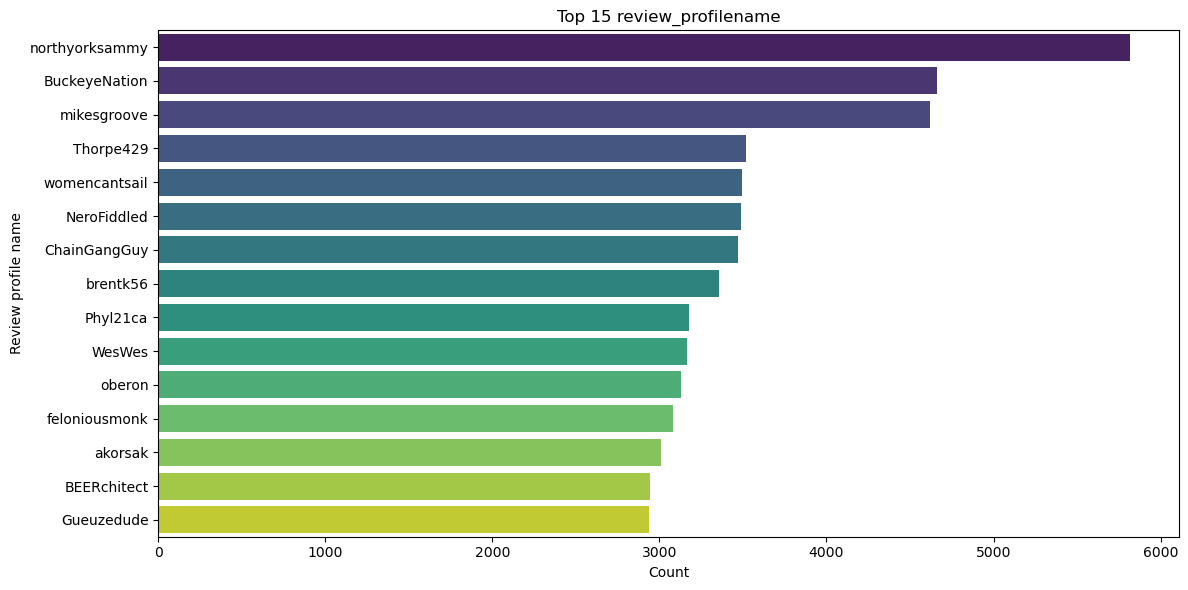

In [86]:
# review_profilename
# Percentage of each review_profilename in relation to the total
beer['review_profilename'].value_counts(normalize=True) * 100


# Get the top 15 most frequent review_profilename
top15_review_profilename = beer['review_profilename'].value_counts().nlargest(15).index

# Filter the DataFrame to include only those brewery
review_profilename_top15 = beer[beer['review_profilename'].isin(top15_review_profilename)]

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.countplot(data=review_profilename_top15, y='review_profilename', order=top15_review_profilename, palette='viridis')

plt.title('Top 15 review_profilename')
plt.xlabel('Count')
plt.ylabel('Review profile name')
plt.tight_layout()
plt.show()

##### Insights

These plots help to understand which beer styles were reviewed the most, which may also be related to the beer styles that were most consumed. They also show the breweries with the most reviews, potentially suggesting the breweries that were most visited by users. Additionally, they indicate the users who are most active in reviewing, which suggests that these are the users who consume the product the most.

### Bivariate Analysis

#### Categorical + Numeric

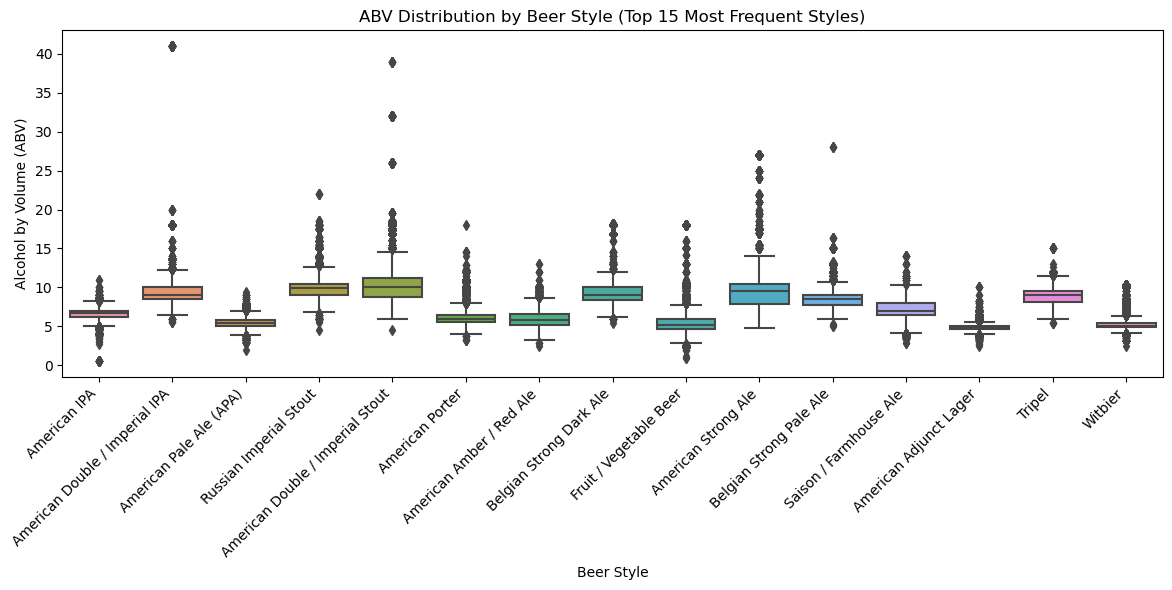

In [87]:
# beer_style + beer_abv_mean_fill

# Filter the 15 most frequent beer styles
top_styles = list(beer['beer_style'].value_counts().nlargest(15).index)
df_top = beer[beer['beer_style'].isin(top_styles)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top, x='beer_style', y='beer_abv_mean_fill', order=top_styles)
plt.xticks(ticks=range(len(top_styles)), labels=top_styles, rotation=45, ha='right')
plt.title('ABV Distribution by Beer Style (Top 15 Most Frequent Styles)')
plt.xlabel('Beer Style')
plt.ylabel('Alcohol by Volume (ABV)')
plt.tight_layout()
plt.show()

In [88]:
# Calculating std
top_styles = beer['beer_style'].value_counts().nlargest(15).index


beer['beer_style'] = beer['beer_style'].astype(str)


df_top = beer[beer['beer_style'].isin(top_styles)]


abv_std_by_style = df_top.groupby('beer_style')['beer_abv_mean_fill'].std().loc[top_styles]
print(abv_std_by_style)

beer_style
American IPA                        0.566018
American Double / Imperial IPA      1.888820
American Pale Ale (APA)             0.565016
Russian Imperial Stout              1.584972
American Double / Imperial Stout    2.769471
American Porter                     1.305109
American Amber / Red Ale            1.142649
Belgian Strong Dark Ale             1.809967
Fruit / Vegetable Beer              2.169462
American Strong Ale                 2.907647
Belgian Strong Pale Ale             1.323124
Saison / Farmhouse Ale              1.240895
American Adjunct Lager              0.410008
Tripel                              0.894779
Witbier                             1.252107
Name: beer_abv_mean_fill, dtype: float64


std < 0.5: low → the style has a very consistent ABV

0.5 < std < 1.0: medium → natural variations between brands

std > 1.0: high → the style includes beers with quite different ABVs

std > 2.0: very high → the style might be grouping very different kinds of beers

##### Insights

More traditional and simple styles (American IPA, APA, American Adjunct Lager) have more consistent and predictable ABV values, with low standard deviations (less than 0.6).

Styles labeled as “Strong” or “Imperial” (e.g., American Double IPA, Imperial Stout, American Strong Ale) show much greater variation in ABV, with standard deviations above 1.5, reaching nearly 3.

This reflects reality: strong styles vary a lot because they include everything from “standard” versions to highly concentrated and alcoholic ones.

Styles with fruit and adjuncts also exhibit high variation, as they can include both lighter beers and others with higher alcohol content.

The outliers in the plot confirm this variation, showing that within the same style, the range of ABV can be quite wide.

These ABV patterns can help brewers decide which styles to standardize for the mass market and which to explore creatively for niche or premium segments.

#### Categorical + Categorical

In [89]:
# beer_style + review_profilename

# Step 1: Count reviews per user per style
user_style_counts = beer.groupby(['review_profilename', 'beer_style']).size().reset_index(name='count')

# Step 2: Total reviews per user
user_total_reviews = user_style_counts.groupby('review_profilename')['count'].sum()

# Step 3: Max reviews for a single style per user
user_max_style = user_style_counts.groupby('review_profilename')['count'].max()

# Step 4: Filter only users with more than 1 review
valid_users = user_total_reviews[user_total_reviews > 1].index

# Step 5: Calculate focus ratio only for valid users
focus_ratio = (user_max_style[valid_users] / user_total_reviews[valid_users]).sort_values(ascending=True)

print(focus_ratio.head(10))


review_profilename
yelterdow         0.035330
jdhilt            0.037159
elricorico        0.037383
DaPeculierDane    0.038501
clvand0           0.038552
SilentSabre       0.039074
hyuga             0.039216
ADR               0.039660
jar2574           0.040000
TheDM             0.040107
Name: count, dtype: float64


1.0 → the user only reviewed one beer style (or almost exclusively one).

~0.6 → around 60% of the user’s reviews are for the same style.

<0.3 → the user has a diverse set of reviews across multiple styles.

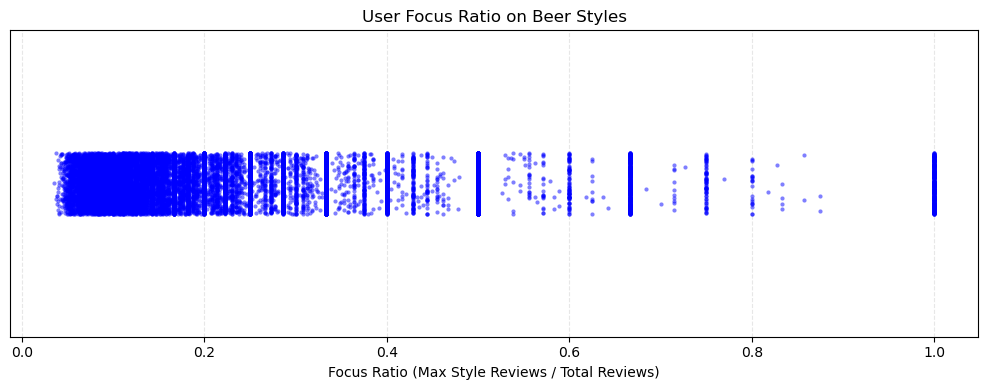

In [90]:
plt.figure(figsize=(10, 4))
sns.stripplot(x=focus_ratio.values, size=3, color='blue', alpha=0.5)

plt.title('User Focus Ratio on Beer Styles')
plt.xlabel('Focus Ratio (Max Style Reviews / Total Reviews)')
plt.yticks([])  # Hide y-axis labels (usernames)
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

##### Insights

The scatter plot reveals a wide range of user focus ratios on beer styles, from nearly zero to one, indicating that some users concentrate their reviews on a single style while others distribute their reviews more evenly across multiple styles. Most users tend to have low focus ratios, clustering below 0.2, which suggests a diverse taste profile rather than specialization. The users with the lowest focus ratios, such as yelterdow and jdhilt, demonstrate particularly balanced reviewing behavior, showing openness to exploring many different beer styles. This pattern implies that users with low focus would likely appreciate varied recommendations, whereas those with higher focus might prefer niche, style-specific suggestions. Overall, this data provides a useful way to segment users into specialists and generalists, which can enhance personalized marketing and recommendation strategies.

#### Numeric + Numeric

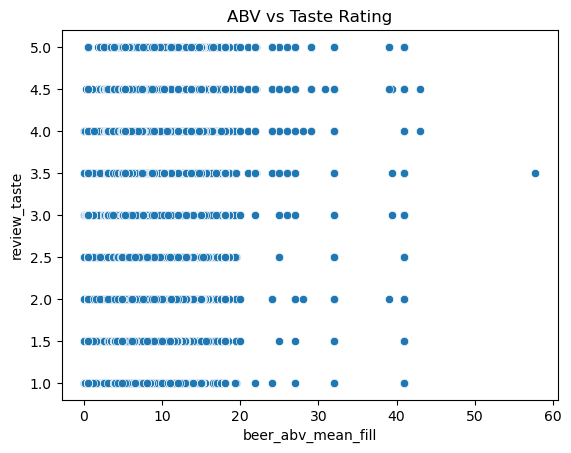

In [91]:
# beer_abv_mean_fill + review_taste

sns.scatterplot(data=beer, x='beer_abv_mean_fill', y='review_taste')
plt.title('ABV vs Taste Rating')
plt.show()

In [92]:
# Calculate Pearson correlation
correlation = beer['beer_abv_mean_fill'].corr(beer['review_taste'], method='pearson')
print(f'Pearson correlation: {correlation:.4f}')

Pearson correlation: 0.2923


#> 0: The higher the ABV, the higher the taste rating.

< 0: The higher the ABV, the lower the taste rating.

≈ 0: No apparent linear relationship.

In [93]:
# Calculate Spearman correlation
correlation = beer['beer_abv_mean_fill'].corr(beer['review_taste'], method='spearman')
print(f'Spearman correlation: {correlation:.4f}')

Spearman correlation: 0.3475


The scatter plot shows a weak but positive relationship between beer alcohol content and taste ratings, with data points spread out and taste ratings clustered at discrete levels. The Pearson correlation coefficient of 0.2923 indicates a weak linear association, while the Spearman correlation of 0.3475 suggests a slightly stronger monotonic relationship. Given the non-linear pattern and ordinal nature of taste ratings, Spearman’s coefficient is more appropriate here. Overall, the results imply that higher alcohol content tends to be associated with better taste ratings, but the relationship is moderate and not strictly linear.

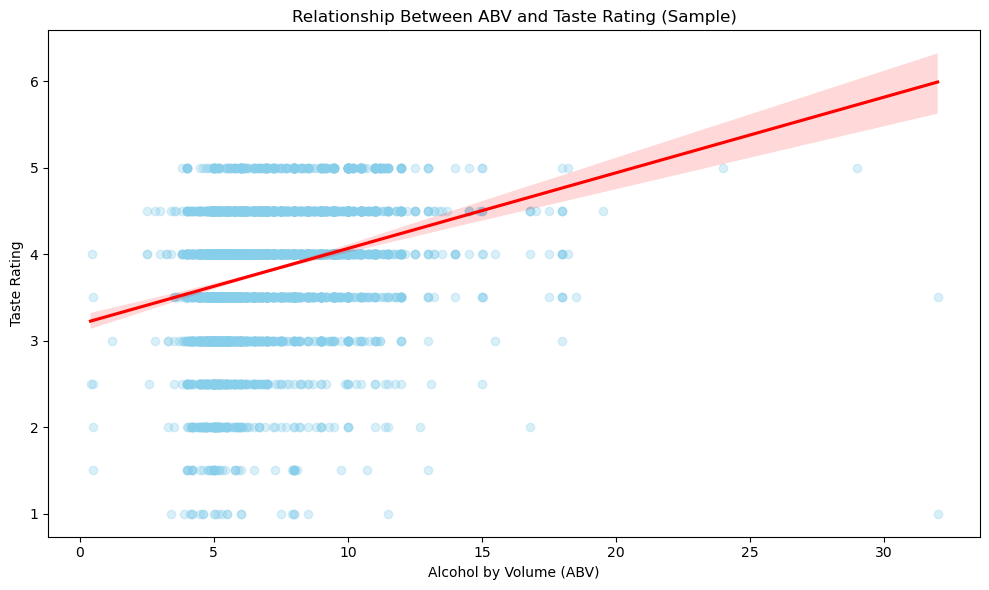

In [94]:
# Random sample of 5,000 rows 
sample_df = beer.sample(n=5000, random_state=42)

# Plot: ABV vs Taste Rating with regression line
plt.figure(figsize=(10, 6))
sns.regplot(
    data=sample_df,
    x='beer_abv_mean_fill',
    y='review_taste',
    scatter_kws={'alpha': 0.3, 'color': 'skyblue'},
    line_kws={'color': 'red'}
)

plt.title('Relationship Between ABV and Taste Rating (Sample)')
plt.xlabel('Alcohol by Volume (ABV)')
plt.ylabel('Taste Rating')
plt.tight_layout()
plt.show()

This scatter plot displays the relationship between Alcohol by Volume (ABV) and Taste Rating, with a fitted regression line and confidence interval shown in red. The data points are spread across discrete taste ratings, mainly between 1 and 5, with ABV values concentrated mostly below 15 but extending up to around 32. The positive slope of the regression line suggests that, on average, beers with higher alcohol content tend to receive higher taste ratings. However, there is considerable variability in taste ratings at all levels of ABV, indicating that other factors also influence taste. The confidence interval around the regression line is relatively narrow at lower ABV values but widens as ABV increases, reflecting increased uncertainty in predictions for beers with very high alcohol content. Overall, the plot supports a moderate positive association between ABV and taste rating.

### Final Observations

This analysis gives breweries useful information to help improve their products and reach more customers.
We saw that alcohol levels are pretty steady in popular beer styles, which is important for meeting customer expectations. But in specialty or stronger beers, there’s more variation—this gives breweries a chance to be creative and offer something unique.
We also found that many drinkers try different kinds of beers, so having a variety of styles can attract more people.
Stronger beers tend to get better taste ratings, which means breweries might want to consider making some higher-alcohol options to please those who like bold flavors.
Overall, these insights help breweries make smarter decisions about what beers to brew and how to market them, so they can grow their business and keep customers happy.
